##### **LOAD PACKAGES**

In [16]:
library(ggplot2)
library(dplyr)

##### **LOAD DATASET**

In [ ]:
# Change Path Accordingly
data <- read.csv("/home/ilesh-dhall/Metabolomics-Biomarker-Discovery/data/A_Targeted_Metabolomics-Based_Assay_Using_Human_Induced_Pluripotent_Stem_Cell-Derived_Cardiomyocytes_rawdata.csv", stringsAsFactors = FALSE)

##### **INSPECTING DATA**

In [3]:
# Dataset Structure
str(data)

'data.frame':	22894 obs. of  8 variables:
 $ Compound     : chr  "Phenylphenol" "Phenylphenol" "Phenylphenol" "Phenylphenol" ...
 $ Effect       : chr  "Non" "Non" "Non" "Non" ...
 $ Metabolite   : chr  "Arachidonic Acid" "2'-deoxycytidine" "Thymidine" "2'-deoxycytidine" ...
 $ Plate        : chr  "C166" "C166" "C166" "C166" ...
 $ Dose         : num  1e-01 1e+02 1e-01 3e-01 1e+01 1e+01 1e+02 1e+02 3e-02 3e+00 ...
 $ SampleType   : chr  "cells" "cells" "cells" "cells" ...
 $ Well         : chr  "f5" "f11" "f5" "f6" ...
 $ ApexIntensity: num  347678 1875 18610 4940 52747 ...


In [4]:
head(data)
tail(data)

,Compound,Effect,Metabolite,Plate,Dose,SampleType,Well,ApexIntensity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Phenylphenol,Non,Arachidonic Acid,C166,0.1,cells,f5,347678.250
2,Phenylphenol,Non,2'-deoxycytidine,C166,100.0,cells,f11,1875.018
3,Phenylphenol,Non,Thymidine,C166,0.1,cells,f5,18609.705
4,Phenylphenol,Non,2'-deoxycytidine,C166,0.3,cells,f6,4940.108
5,Phenylphenol,Non,Thymidine.D4,C166,10.0,media,h9,52746.977
6,Phenylphenol,Non,Thymidine.D4,C166,10.0,cells,e9,57914.594


,Compound,Effect,Metabolite,Plate,Dose,SampleType,Well,ApexIntensity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
22889,Verapamil,Cardiotoxic,Lactate,C148,30,media,h2,17300.06
22890,Verapamil,Cardiotoxic,Thymidine.D4,C147,30,cells,e2,68259.00
22891,Verapamil,Cardiotoxic,Arachidonic Acid,C173,30,cells,e2,211973.20
22892,Verapamil,Cardiotoxic,Thymidine.D4,C158,30,cells,e2,86957.87
22893,Verapamil,Cardiotoxic,Arachidonic Acid,C173,30,cells,g2,249296.16
22894,Verapamil,Cardiotoxic,Lactate.D3,C147,30,cells,e2,18778.38


In [5]:
summary(data)

   Compound            Effect           Metabolite           Plate          
 Length:22894       Length:22894       Length:22894       Length:22894      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
      Dose           SampleType            Well           ApexIntensity      
 Min.   :   0.003   Length:22894       Length:22894       Min.   :    337.1  
 1st Qu.:   0.100   Class :character   Class :character   1st Qu.:  10536.8  
 Median :   1.000   Mode  :character   Mode  :character   Median :  21309.8  
 Mean   :  18.315                                         Mean   :  76140.7  
 3rd Qu.:  10.000                                         3rd Qu.:  680

In [6]:
# Checking Unique Keys Across Features
unique(data$Compound)
unique(data$Effect)
unique(data$Metabolite)
unique(data$Dose)
unique(data$SampleType)

[1] "Phenylphenol"         "Fluorouracil"         "Acyclovir"           
 [4] "Amiodarone"           "Amitriptyline"        "Amoxicillin"         
 [7] "Amphotericin B"       "Anagrelide"           "Arsenic Trioxide"    
[10] "Ascorbic Acid"        "Aspartame"            "Astemizole"          
[13] "Benzoic Acid"         "Biotin"               "Bortezomib"          
[16] "Chloroquine"          "Cisapride"            "Citric Acid"         
[19] "Clozapine"            "Dasatinib"            "Daunorubicin"        
[22] "Dexfenfluramine"      "Dithiazanine Iodide"  "DMSO"                
[25] "Dofetilide"           "Doxorubicin"          "Encainide"           
[28] "Erlotinib"            "Hexylresorcinol"      "Idarubicin"          
[31] "Imatinib"             "Isoproterenol"        "Lapatinib"           
[34] "Leucine"              "Maltol"               "Methylparaben"       
[37] "Mitoxantrone"         "Natamycin"            "Nifedipine"          
[40] "Nortriptyline"        "Paclitaxel"           "Pergolide"           
[43] "Ranitidine"           "Rofecoxib"            "Sertindole"          
[46] "Sorafenib"            "Acetylsalicylic Acid" "Sotalol"             
[49] "Sucrose"              "Xylitol"              "Bepridil"            
[52] "Busulfan"             "Cetirizine"           "Levomethadyl Acetate"
[55] "Loratadine"           "Nilotinib"            "Rosiglitazone"       
[58] "Sildenafil"           "Adipic Acid"          "Ondansetron"         
[61] "Quinidine"            "Tolbutamide"          "Amsacrine"           
[64] "Axitinib"             "Azidothymidine"       "Chlorpromazine"      
[67] "Cimetidine"           "Gemfibrozil"          "Nandrolone Decanoate"
[70] "Praziquantel"         "Sunitinib"            "Tartaric Acid"       
[73] "Tegaserod"            "Terfenadine"          "Thiabendazole"       
[76] "Thioridazine"         "Telmisartan"          "Trastuzumab"         
[79] "Crizotinib"           "Valdecoxib"           "Vandetanib"          
[82] "Verapamil"

[1] "Non"            "Cardiotoxic"    "SolventControl"

[1] "Arachidonic Acid" "2'-deoxycytidine" "Thymidine"        "Thymidine.D4"    
[5] "Lactate"          "Citrulline-D4"    "Lactate.D3"

[1] 1e-01 1e+02 3e-01 1e+01 3e-02 3e+00 3e+01 1e+00 1e-02 3e-03 3e+02 6e+02
[13] 2e+03 6e-01 6e+00 2e+00 2e+02 2e+01 6e+01 5e-03

[1] "cells" "media"

##### **CHECKING FOR MISSING VALUES**

In [7]:
# Check for missing values
missing_values <- sapply(data, function(x) sum(is.na(x)))
missing_values

Compound        Effect    Metabolite         Plate          Dose 
            0             0             0             0             0 
   SampleType          Well ApexIntensity 
            0             0             0

##### **NORMALIZING VALUES**

In [8]:
# Log Transformation
data$log_ApexIntensity <- log(data$ApexIntensity)

# Z-score Transformation
data$z_ApexIntensity <- scale(data$ApexIntensity)

In [9]:
head(data)
tail(data)

,Compound,Effect,Metabolite,Plate,Dose,SampleType,Well,ApexIntensity,log_ApexIntensity,z_ApexIntensity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
1,Phenylphenol,Non,Arachidonic Acid,C166,0.1,cells,f5,347678.250,12.759033,2.0528764
2,Phenylphenol,Non,2'-deoxycytidine,C166,100.0,cells,f11,1875.018,7.536374,-0.5614624
3,Phenylphenol,Non,Thymidine,C166,0.1,cells,f5,18609.705,9.831439,-0.4349450
4,Phenylphenol,Non,2'-deoxycytidine,C166,0.3,cells,f6,4940.108,8.505142,-0.5382898
5,Phenylphenol,Non,Thymidine.D4,C166,10.0,media,h9,52746.977,10.873262,-0.1768607
6,Phenylphenol,Non,Thymidine.D4,C166,10.0,cells,e9,57914.594,10.966725,-0.1377925


,Compound,Effect,Metabolite,Plate,Dose,SampleType,Well,ApexIntensity,log_ApexIntensity,z_ApexIntensity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
22889,Verapamil,Cardiotoxic,Lactate,C148,30,media,h2,17300.06,9.758465,-0.44484615
22890,Verapamil,Cardiotoxic,Thymidine.D4,C147,30,cells,e2,68259.00,11.131065,-0.05958679
22891,Verapamil,Cardiotoxic,Arachidonic Acid,C173,30,cells,e2,211973.20,12.264215,1.02692019
22892,Verapamil,Cardiotoxic,Thymidine.D4,C158,30,cells,e2,86957.87,11.373179,0.08178024
22893,Verapamil,Cardiotoxic,Arachidonic Acid,C173,30,cells,g2,249296.16,12.426397,1.30908888
22894,Verapamil,Cardiotoxic,Lactate.D3,C147,30,cells,e2,18778.38,9.840461,-0.43366981


##### **FEATURE ENGINEERING**

In [10]:
# Group dose levels
data$Dose_group <- cut(data$Dose, breaks = c(0, 1, 10, 100), labels = c("Low", "Medium", "High"))

In [11]:
head(data)

,Compound,Effect,Metabolite,Plate,Dose,SampleType,Well,ApexIntensity,log_ApexIntensity,z_ApexIntensity,Dose_group
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>",<fct>
1,Phenylphenol,Non,Arachidonic Acid,C166,0.1,cells,f5,347678.250,12.759033,2.0528764,Low
2,Phenylphenol,Non,2'-deoxycytidine,C166,100.0,cells,f11,1875.018,7.536374,-0.5614624,High
3,Phenylphenol,Non,Thymidine,C166,0.1,cells,f5,18609.705,9.831439,-0.4349450,Low
4,Phenylphenol,Non,2'-deoxycytidine,C166,0.3,cells,f6,4940.108,8.505142,-0.5382898,Low
5,Phenylphenol,Non,Thymidine.D4,C166,10.0,media,h9,52746.977,10.873262,-0.1768607,Medium
6,Phenylphenol,Non,Thymidine.D4,C166,10.0,cells,e9,57914.594,10.966725,-0.1377925,Medium


#### **QUICK EDA**

##### **APEX INTENSITY DISTRIBUTION**

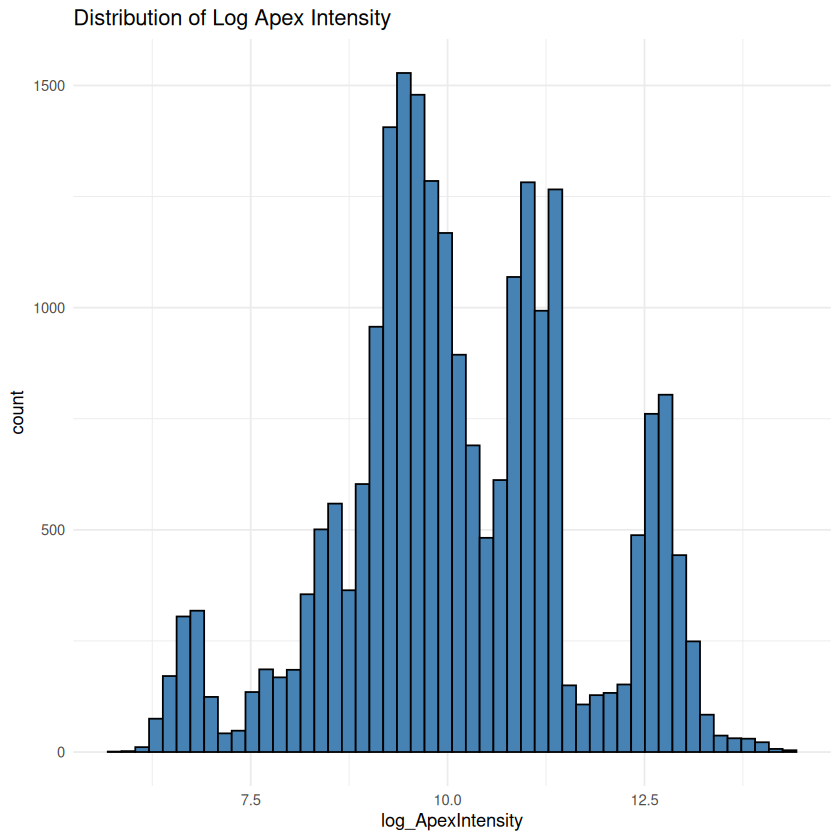

In [12]:
ggplot(data, aes(x = log_ApexIntensity)) +
  geom_histogram(bins = 50, fill = "steelblue", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of Log Apex Intensity")

##### **BOXPLOT OF METABOLOMITE BY EFFECT**

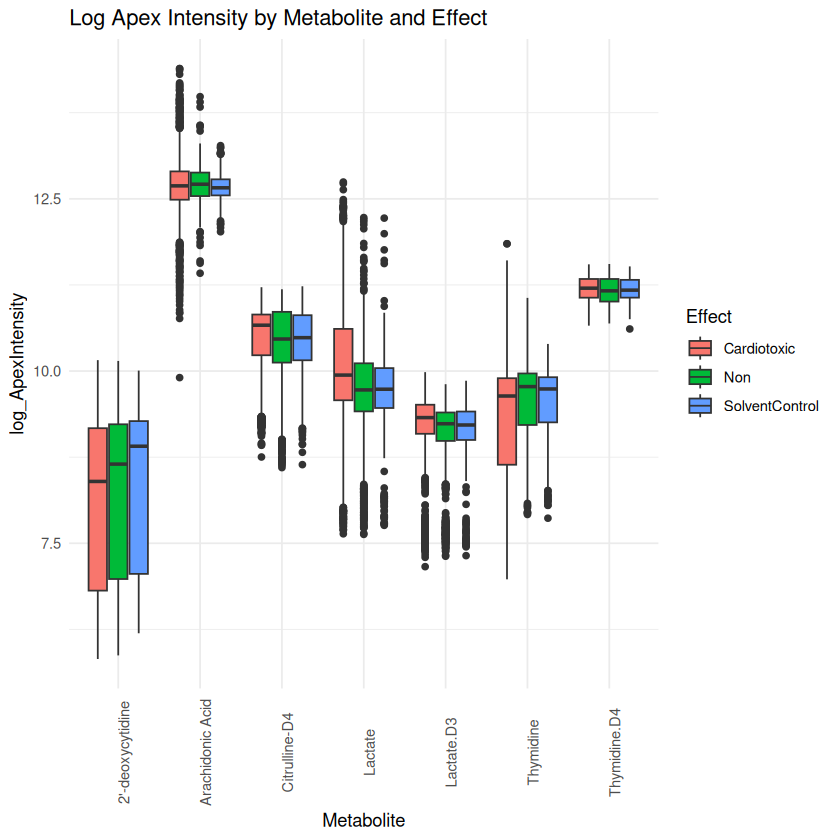

In [13]:
ggplot(data, aes(x = Metabolite, y = log_ApexIntensity, fill = Effect)) +
  geom_boxplot() +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title = "Log Apex Intensity by Metabolite and Effect")


##### **VIOLIN PLOT: SAMPLE TYPE COMPARISON (CELLS vs MEDIA)**

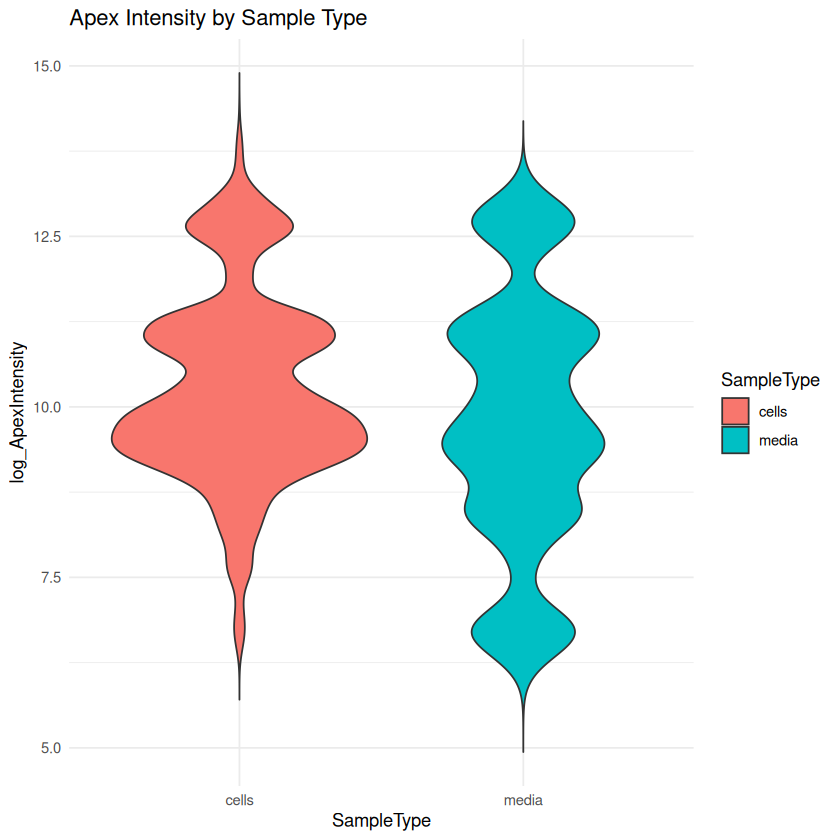

In [14]:
ggplot(data, aes(x = SampleType, y = log_ApexIntensity, fill = SampleType)) +
  geom_violin(trim = FALSE) +
  theme_minimal() +
  labs(title = "Apex Intensity by Sample Type")


##### **GEOM PLOT: DOSE V/S APEXINTENSITY**

`geom_smooth()` using formula = 'y ~ x'


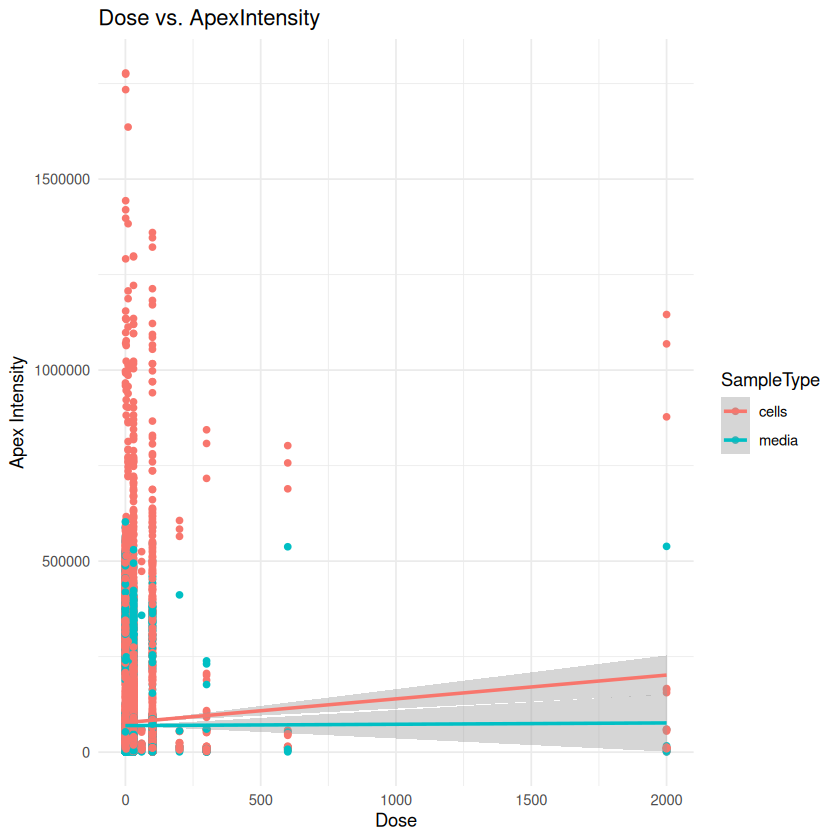

In [15]:
ggplot(data, aes(x = Dose, y = ApexIntensity, color = SampleType)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_minimal() +
  labs(title = "Dose vs. ApexIntensity",
       x = "Dose",
       y = "Apex Intensity")